In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Zadanie2

In [3]:
df = pd.read_csv('DJIA_ClosingValues_1896-10-07-2025-03-28.csv')
print(df.head())

         Date     DJIA
0   10/7/1896  28.5719
1   10/8/1896  28.4903
2   10/9/1896  28.2166
3  10/10/1896  27.9428
4  10/12/1896  27.6748


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34708 entries, 0 to 34707
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    34708 non-null  object 
 1   DJIA    34708 non-null  float64
dtypes: float64(1), object(1)
memory usage: 542.4+ KB
None


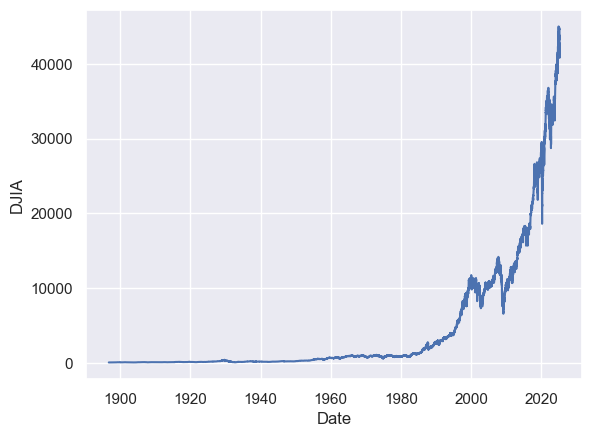

In [14]:
df["Date"] = pd.to_datetime(df["Date"])


sns.lineplot(data=df, x='Date', y='DJIA')
plt.show()

In [16]:
mean = np.mean(df["DJIA"])
std = np.std(df["DJIA"])
min = np.min(df["DJIA"])
max = np.max(df["DJIA"])

print(f"Mean: {mean}, std: {std}, min: {min}, max: {max}")

Mean: 3991.6182658176785, std: 7970.641703901435, min: 27.6748, max: 45014.04


Zadanie3

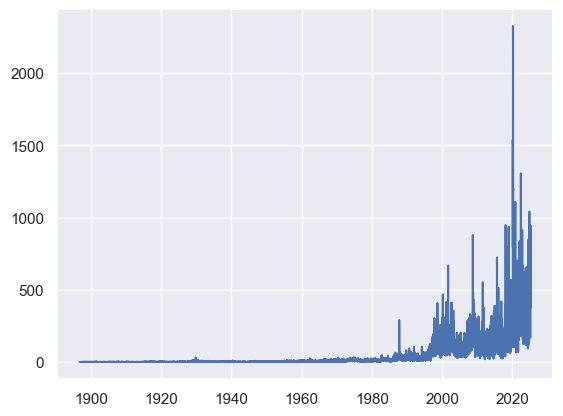

In [40]:
#Ekstrakja cech
ts = df.set_index('Date')['DJIA']

seasonality = ts.resample("YE").mean() #srednia

trend = ts.rolling(window=10).mean() #srednia ruchoma

variability = ts.rolling(window=10).std() # Odchylenie standardowe dla średniej ruchomej


plt.plot(variability, label="Variabilty")


In [69]:
df = pd.read_csv('DJIA_ClosingValues_1896-10-07-2025-03-28.csv')
df["Date"] = pd.to_datetime(df["Date"])
print(df.head())

        Date     DJIA
0 1896-10-07  28.5719
1 1896-10-08  28.4903
2 1896-10-09  28.2166
3 1896-10-10  27.9428
4 1896-10-12  27.6748


In [ ]:
#branie rocznej sredniej 
df.set_index('Date', inplace=True)

miesięczna = df['DJIA'].resample('ME').mean()

print(miesięczna.head())



Date
1896-10-31    28.952095
1896-11-30    31.940043
1896-12-31    30.542160
1897-01-31    30.613580
1897-02-28    29.925582
Freq: ME, Name: DJIA, dtype: float64


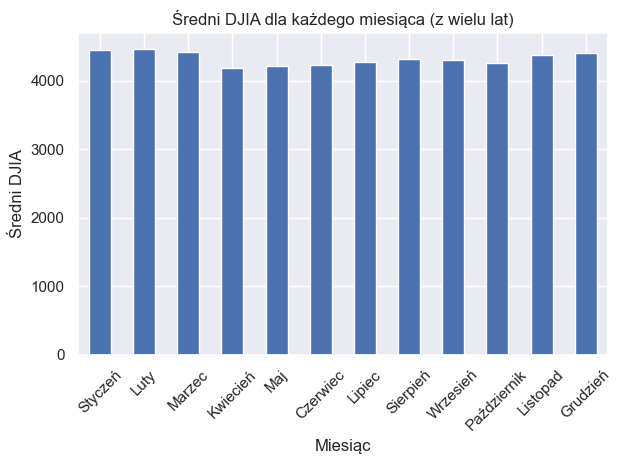

In [ ]:
miesięczna_df = miesięczna.to_frame(name='DJIA')
miesięczna_df['miesiąc'] = miesięczna_df.index.month

# Średnia DJIA dla każdego miesiąca (z wielu lat)
srednia_mies = miesięczna_df.groupby('miesiąc')['DJIA'].mean()


srednia_mies.plot(kind='bar', title='Średni DJIA dla każdego miesiąca (z wielu lat)')
plt.xlabel('Miesiąc')
plt.ylabel('Średni DJIA')
plt.xticks(ticks=range(0,12), labels=['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                                      'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'],
           rotation=45)
plt.tight_layout()
plt.show()


In [74]:
df = pd.read_csv("Indeksy_gieldowe_2015-2025-03-31/DAX_data_2025-03-31.csv", header=1)
print(df.head())

       Ticker       ^GDAXI     ^GDAXI.1     ^GDAXI.2     ^GDAXI.3     ^GDAXI.4
0        Date          NaN          NaN          NaN          NaN          NaN
1  2015-01-02  9764.730469  9879.530273  9687.259766  9869.129883   67673900.0
2  2015-01-05  9473.160156  9790.269531  9468.580078  9735.650391  105538300.0
3  2015-01-06  9469.660156  9624.650391  9382.820312  9484.250000   96812300.0
4  2015-01-07  9518.179688  9592.370117  9459.179688  9510.339844   82466600.0


In [76]:
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
print(df.head())


         Date        Close         High          Low         Open       Volume
0        Date          NaN          NaN          NaN          NaN          NaN
1  2015-01-02  9764.730469  9879.530273  9687.259766  9869.129883   67673900.0
2  2015-01-05  9473.160156  9790.269531  9468.580078  9735.650391  105538300.0
3  2015-01-06  9469.660156  9624.650391  9382.820312  9484.250000   96812300.0
4  2015-01-07  9518.179688  9592.370117  9459.179688  9510.339844   82466600.0


In [94]:
df = df.drop(index = 0)
print(df.head())

         Date        Close         High          Low         Open       Volume
1  2015-01-02  9764.730469  9879.530273  9687.259766  9869.129883   67673900.0
2  2015-01-05  9473.160156  9790.269531  9468.580078  9735.650391  105538300.0
3  2015-01-06  9469.660156  9624.650391  9382.820312  9484.250000   96812300.0
4  2015-01-07  9518.179688  9592.370117  9459.179688  9510.339844   82466600.0
5  2015-01-08  9837.610352  9855.429688  9607.900391  9643.769531  114825000.0


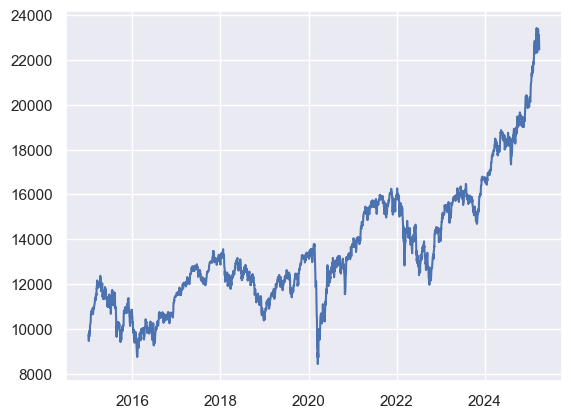

In [96]:
df["Date"] = pd.to_datetime(df["Date"])

plt.plot(df["Date"], df["Close"])
plt.show()

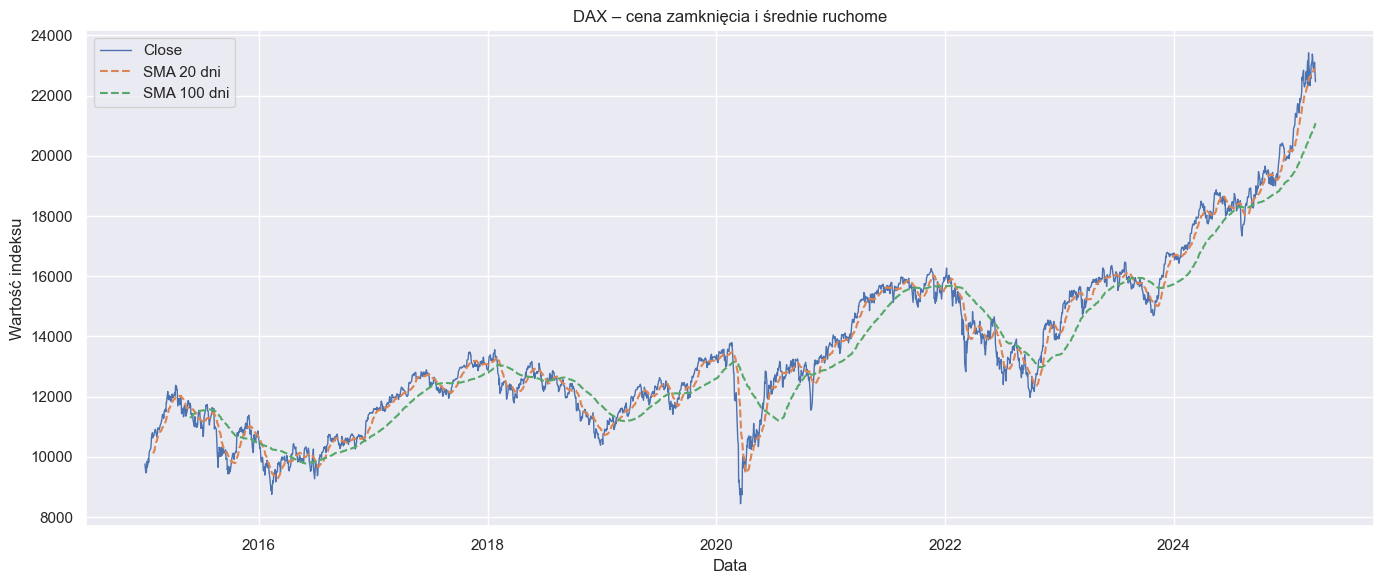

In [ ]:

# Średnia z 20 dni (krótkoterminowa)
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Średnia z 100 dni (długoterminowa)
df['SMA_100'] = df['Close'].rolling(window=100).mean()

miesięczna = df['Close'].resample('ME').mean()


plt.figure(figsize=(14, 6))

plt.plot(df['Close'], label='Close', linewidth=1)
plt.plot(df['SMA_20'], label='SMA 20 dni', linestyle='--')
plt.plot(df['SMA_100'], label='SMA 100 dni', linestyle='--')

plt.title('DAX – cena zamknięcia i średnie ruchome')
plt.xlabel('Data')
plt.ylabel('Wartość indeksu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



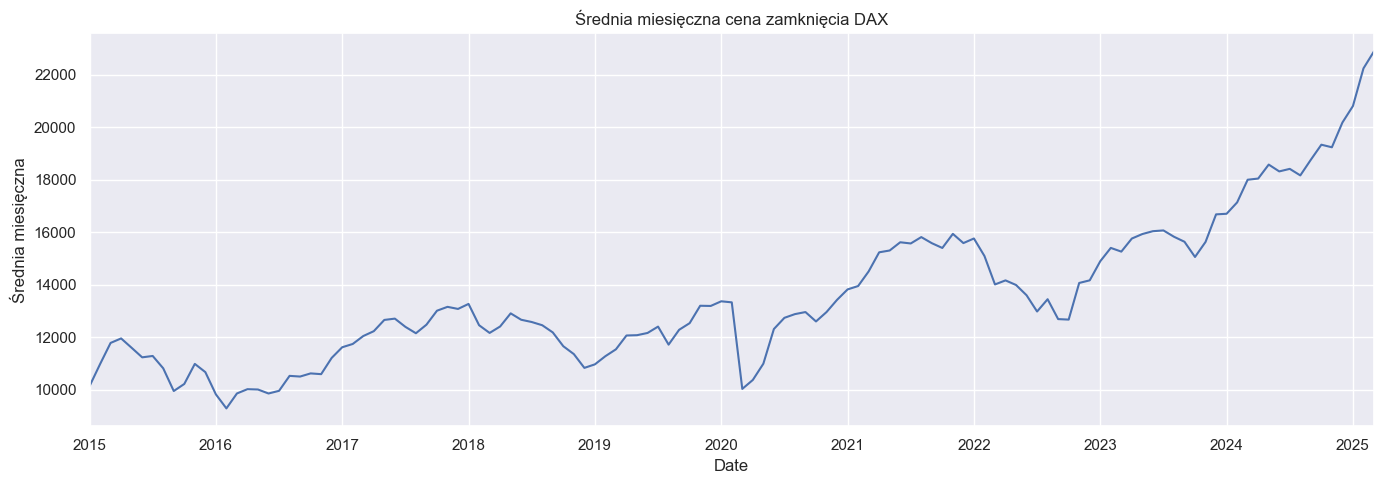

In [104]:
miesięczna.plot(figsize=(14,5), title='Średnia miesięczna cena zamknięcia DAX')
plt.ylabel('Średnia miesięczna')
plt.grid(True)
plt.tight_layout()
plt.show()


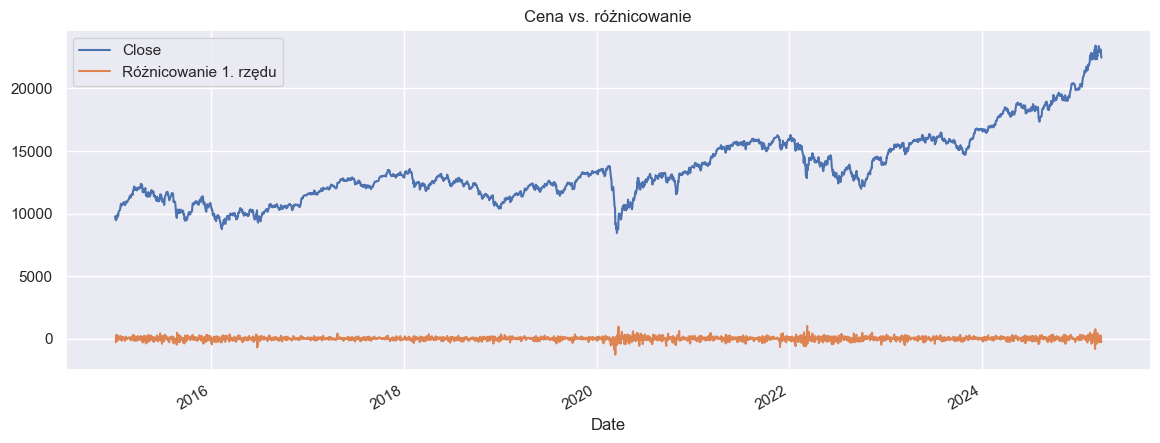

In [ ]:
df['Close'].plot(label='Close', figsize=(14,5))
df['Close'].diff().plot(label='Różnicowanie 1. rzędu')
plt.legend()
plt.title('Cena vs. różnicowanie')
plt.grid(True)
plt.show()


In [ ]:
import os
folder_path = 'Indeksy_gieldowe_2015-2025-03-31'  


In [107]:
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(file_list)


['Bovespa_data_2025-03-31.csv', 'CAC40_data_2025-03-31.csv', 'DAX_data_2025-03-31.csv', 'Dow_Jones_Industrial_Average_data_2025-03-31.csv', 'FTSE100_data_2025-03-31.csv', 'Hang_Seng_data_2025-03-31.csv', 'Nasdaq_Composite_data_2025-03-31.csv', 'Nikkei_225_data_2025-03-31.csv', 'S&P500_data_2025-03-31.csv', 'Shanghai_Composite_data_2025-03-31.csv']


In [111]:
dfs = []

for file in file_list:
    index_name = file.split('_data')[0]


    df = pd.read_csv(os.path.join(folder_path, file), skiprows=2, header=None)


    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


    df = df[['Date', 'Close']]


    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

    df = df.dropna(subset=['Date'])


    df = df.rename(columns={'Close': index_name})

    dfs.append(df)


In [122]:

merged = dfs[0]


for df in dfs[1:]:
    merged = pd.merge(merged, df, on='Date', how='inner')


merged.set_index('Date', inplace=True)


print(merged.head())


            Bovespa        CAC40          DAX  Dow_Jones_Industrial_Average  \
Date                                                                          
2015-01-05  47517.0  4111.359863  9473.160156                  17501.650391   
2015-01-06  48001.0  4083.500000  9469.660156                  17371.640625   
2015-01-07  49463.0  4112.729980  9518.179688                  17584.519531   
2015-01-08  49943.0  4260.189941  9837.610352                  17907.869141   
2015-01-09  48840.0  4179.069824  9648.500000                  17737.369141   

                FTSE100     Hang_Seng  Nasdaq_Composite    Nikkei_225  \
Date                                                                    
2015-01-05  6417.200195  23721.320312       4652.569824  17408.710938   
2015-01-06  6366.500000  23485.410156       4592.740234  16883.189453   
2015-01-07  6419.799805  23681.259766       4650.470215  16885.330078   
2015-01-08  6570.000000  23835.529297       4736.189941  17167.099609   
2015-01-

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  


In [131]:
pca_df = pd.DataFrame(data=X_pca, index=merged.index, columns=['PCA1', 'PCA2'])
print(pca_df.head())


                PCA1      PCA2
Date                          
2015-01-05 -3.808888 -0.025250
2015-01-06 -3.870683 -0.064289
2015-01-07 -3.799497  0.026955
2015-01-08 -3.596377 -0.106402
2015-01-09 -3.708368 -0.133875


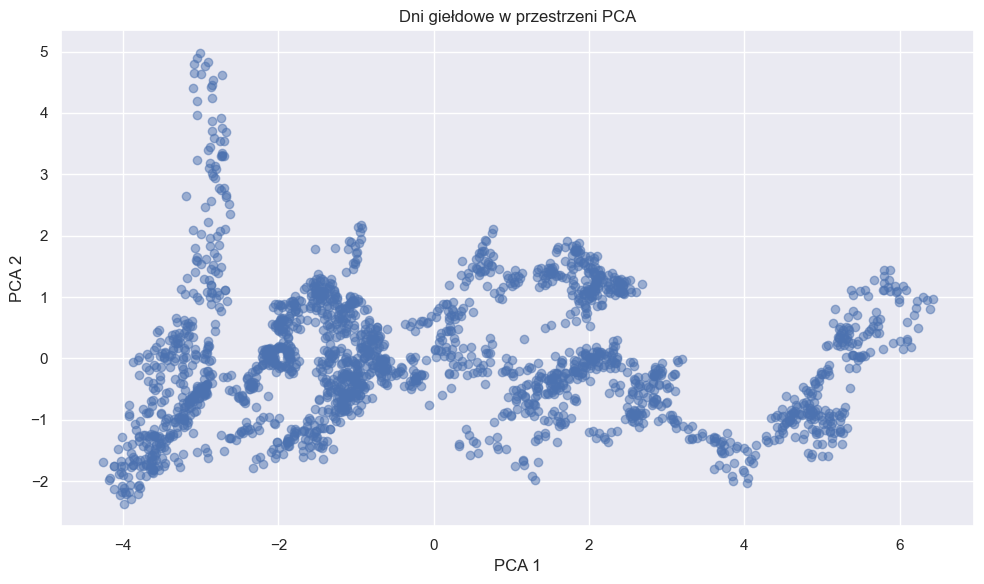

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('Dni giełdowe w przestrzeni PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [133]:
print("Wariancja wyjaśniona:", pca.explained_variance_ratio_)


Wariancja wyjaśniona: [0.72366882 0.11655659]


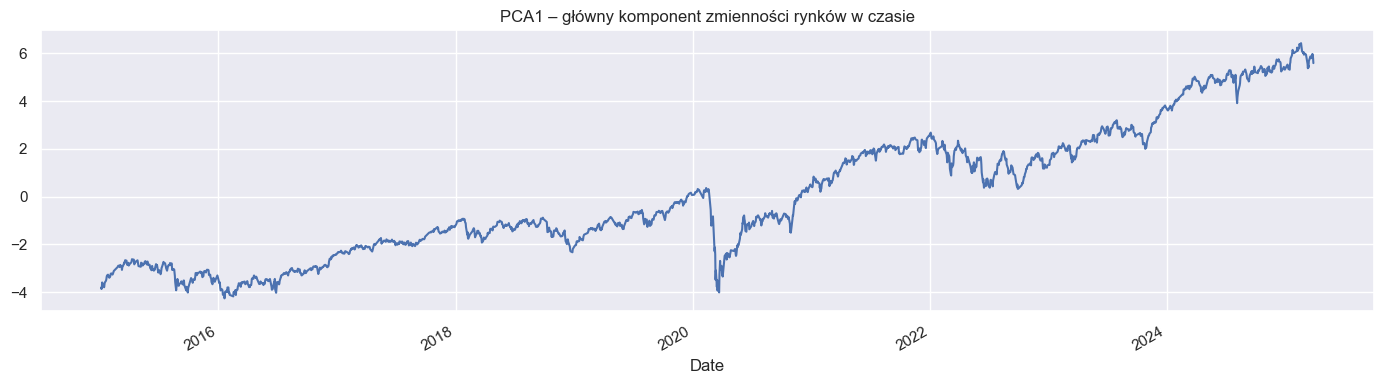

In [ ]:

plt.figure(figsize=(14,4))
pca_df['PCA1'].plot()
plt.title('PCA1 – główny komponent zmienności rynków w czasie')
plt.grid(True)
plt.tight_layout()
plt.show()


In [135]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PCA1', 'PCA2']])

pca_df['Cluster'] = clusters


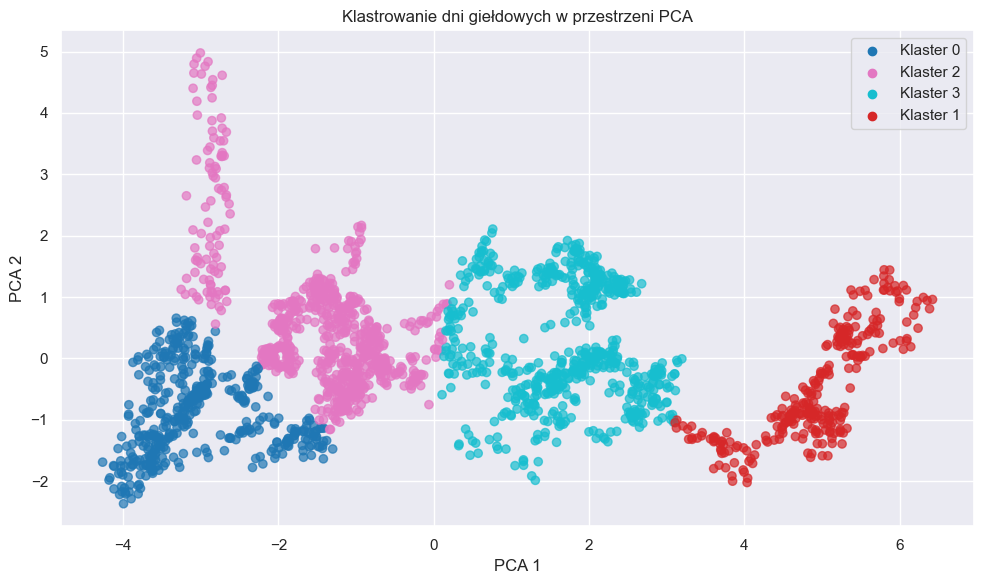

In [140]:


plt.figure(figsize=(10,6))

scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Cluster'],
    cmap='tab10',
    alpha=0.7
)

legend_labels = list(pca_df['Cluster'].unique())
for i in legend_labels:
    plt.scatter([], [], color=scatter.cmap(scatter.norm(i)), label=f'Klaster {i}')
plt.legend()

plt.title('Klastrowanie dni giełdowych w przestrzeni PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
podejrzany_klaster = 1

print(pca_df[pca_df['Cluster'] == podejrzany_klaster].index)


DatetimeIndex(['2023-11-24', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
               '2023-12-07', '2023-12-08',
               ...
               '2025-03-14', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27', '2025-03-28'],
              dtype='datetime64[ns]', name='Date', length=275, freq=None)


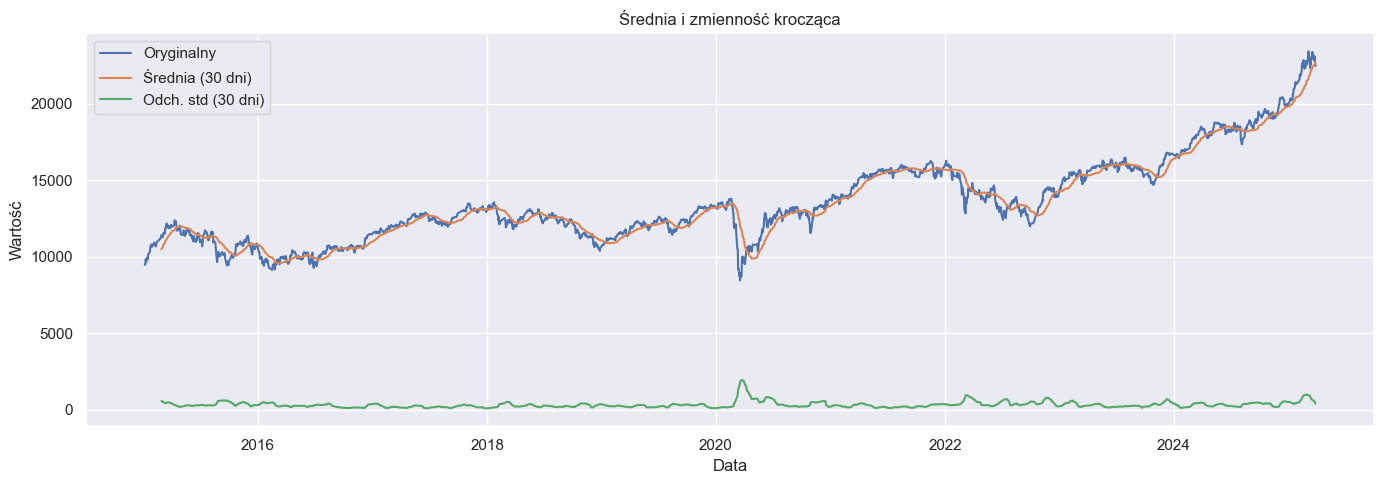

In [ ]:
seria = merged['DAX']  
rolling_mean = seria.rolling(window=30).mean()
rolling_std = seria.rolling(window=30).std()


plt.figure(figsize=(14,5))


plt.plot(seria, label='Oryginalny')


plt.plot(rolling_mean, label='Średnia (30 dni)')

plt.plot(rolling_std, label='Odch. std (30 dni)')

plt.title('Średnia i zmienność krocząca')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


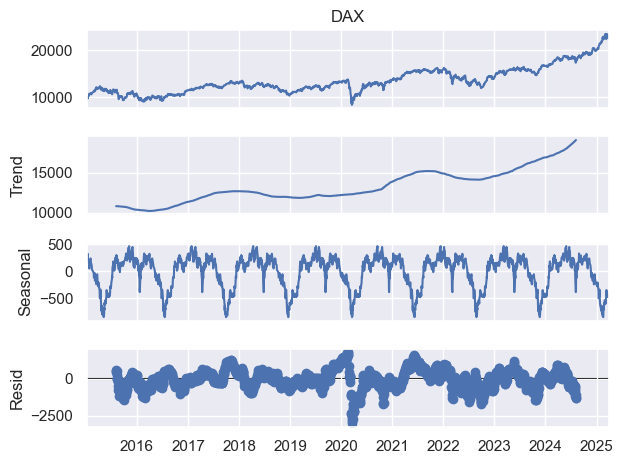

In [157]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(seria.dropna(), model='additive', period=252)  # roczne dane dzienne
fig = result.plot()


zadanie4

In [158]:
print(merged.head())

            Bovespa        CAC40          DAX  Dow_Jones_Industrial_Average  \
Date                                                                          
2015-01-05  47517.0  4111.359863  9473.160156                  17501.650391   
2015-01-06  48001.0  4083.500000  9469.660156                  17371.640625   
2015-01-07  49463.0  4112.729980  9518.179688                  17584.519531   
2015-01-08  49943.0  4260.189941  9837.610352                  17907.869141   
2015-01-09  48840.0  4179.069824  9648.500000                  17737.369141   

                FTSE100     Hang_Seng  Nasdaq_Composite    Nikkei_225  \
Date                                                                    
2015-01-05  6417.200195  23721.320312       4652.569824  17408.710938   
2015-01-06  6366.500000  23485.410156       4592.740234  16883.189453   
2015-01-07  6419.799805  23681.259766       4650.470215  16885.330078   
2015-01-08  6570.000000  23835.529297       4736.189941  17167.099609   
2015-01-

In [159]:
def autocorrelation_numpy(series, lag=1):
    x = series.dropna().values
    return np.corrcoef(x[:-lag], x[lag:])[0, 1]


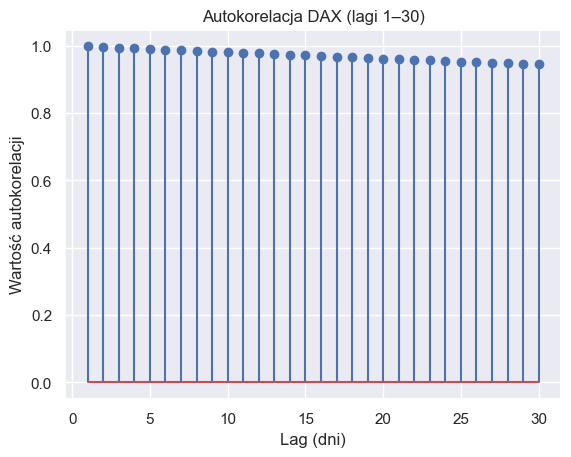

In [161]:
import matplotlib.pyplot as plt

lags = range(1, 31)
values = [merged['DAX'].autocorr(lag=l) for l in lags]

plt.stem(lags, values)
plt.title("Autokorelacja DAX (lagi 1–30)")
plt.xlabel("Lag (dni)")
plt.ylabel("Wartość autokorelacji")
plt.grid(True)
plt.show()


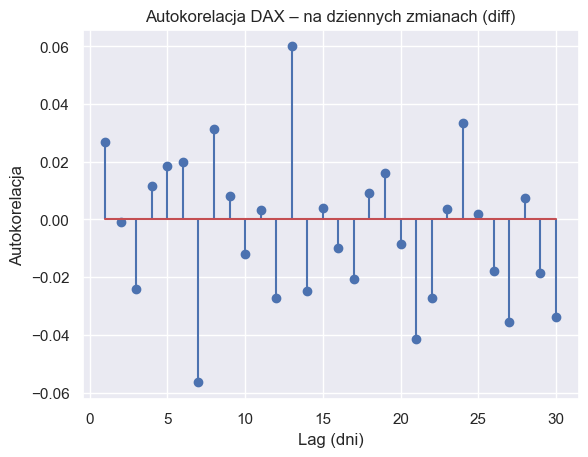

In [163]:
df_diff = merged['DAX'].diff().dropna()

lags = range(1, 31)
values = [df_diff.autocorr(lag=l) for l in lags]

plt.stem(lags, values)
plt.title("Autokorelacja DAX – na dziennych zmianach (diff)")
plt.xlabel("Lag (dni)")
plt.ylabel("Autokorelacja")
plt.grid(True)
plt.show()


In [ ]:
def fft_features(series):
    x = series.dropna().values
    fft_vals = np.fft.fft(x)
    fft_power = np.abs(fft_vals)**2
    freqs = np.fft.fftfreq(len(x))  #częstotliwości
    return freqs[:len(freqs)//2], fft_power[:len(fft_power)//2]  


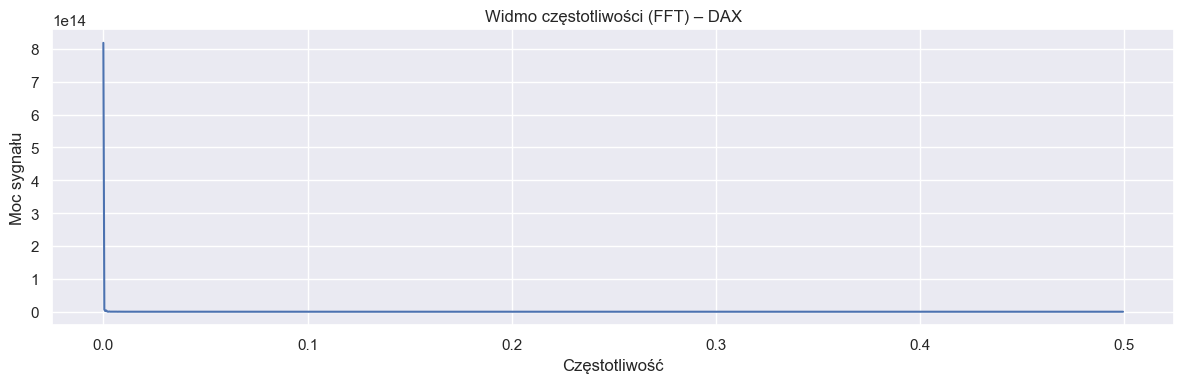

In [166]:
freqs, power = fft_features(merged['DAX'])

plt.figure(figsize=(12,4))
plt.plot(freqs, power)
plt.title("Widmo częstotliwości (FFT) – DAX")
plt.xlabel("Częstotliwość")
plt.ylabel("Moc sygnału")
plt.grid(True)
plt.tight_layout()
plt.show()


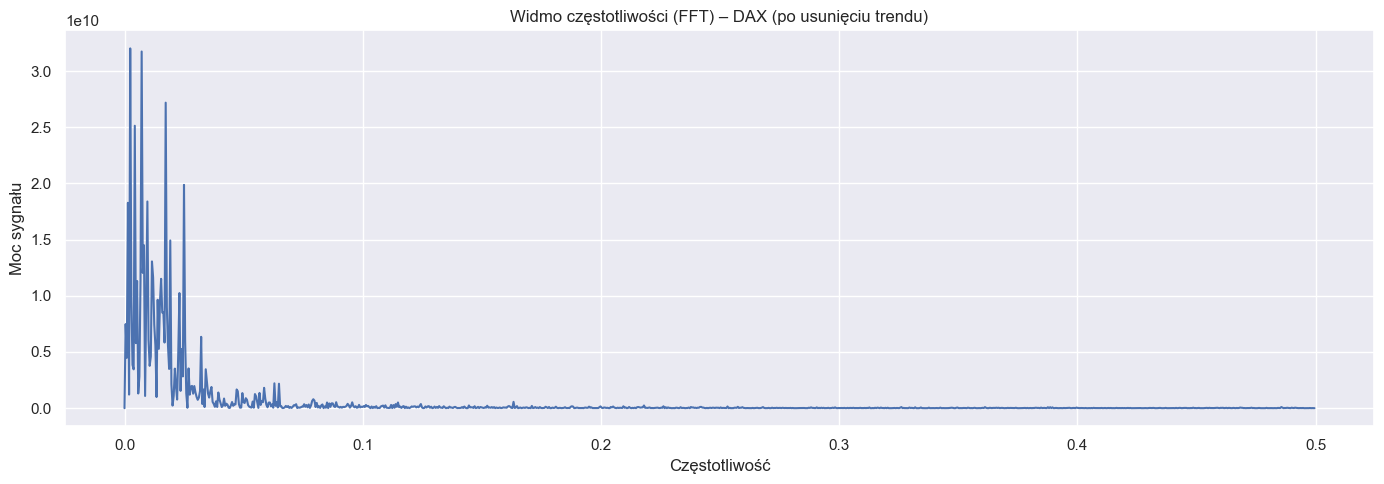

In [ ]:

detrended = seria - seria.rolling(window=30).mean()

detrended = detrended - detrended.mean()

cleaned = detrended.dropna()

fft_vals = np.fft.fft(cleaned)
power = np.abs(fft_vals)**2
freqs = np.fft.fftfreq(len(fft_vals), d=1)

half = len(freqs)//2

plt.figure(figsize=(14,5))
plt.plot(freqs[:half], power[:half])
plt.title("Widmo częstotliwości (FFT) – DAX (po usunięciu trendu)")
plt.xlabel("Częstotliwość")
plt.ylabel("Moc sygnału")
plt.grid(True)
plt.tight_layout()
plt.show()
